<a href="https://colab.research.google.com/github/arthurvale/Bootcamp-Machine-Learning-Atlantico-Avanti/blob/Atividade-04---Etapa-1/%5BDados_teste%5Dclassifica%C3%A7%C3%A3o_imagens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CURSO: **BÁSICO EM MACHINE LEARNING**

- **Escola**: Atlântico Avanti
- **Alunos**: Andressa Siqueira Monte, Arthur Vale Fonseca, Bernardo de Lima Melo, Francisco Alisson Ribeiro da Costa, George Lucas Silva Leitao, Kayky Bezerra da Silva, Natalia da Costa Silva e Samuel Cassiano de Abreu
- **Atividade**: 04 - 1ª etapa
- **Tema**: Projeto de classificação de imagens
- **Conteúdo**: Módulo 3

## Arquivos

- **Dataset**: [Kaggle - Fruit and Vegetable Image Recognition](https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition/data)


- **Verificações**:

  1. Ausência de dados
  2. Intervalo dos dados numéricos
  3. Número de imagens por formato
  4. Dados corrompidos
  5. Número de imagens por classe
  6. Imagens duplicadas no dataset
     -  Imagens presentes em 2 classes diferentes
     -  Imagens iguais no conjunto de treino e no conjunto de teste



**Data**: 10/2024

##  Import bibliotecas e Dataset Kaggle

In [1]:
!pip install opendatasets
!pip install pandas
!pip install imagehash

In [18]:
import opendatasets as od
import pandas as pd

od.download("https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition/data")

Skipping, found downloaded files in "./fruit-and-vegetable-image-recognition" (use force=True to force download)


In [19]:
# Listando os arquivos e diretórios
!ls

fruit-and-vegetable-image-recognition  sample_data


In [20]:
# Importando Bibliotecas externas (OpenCV e Módulo os)
import cv2 # para trabalhar com imagens
import os # importa o módulo para interagir com o sistema operacional

In [22]:
# importando Bibiloteca imagehash
'''Este comando importa a biblioteca imagehash, que é usada para gerar hashes perceptuais de imagens.
Hashing perceptual é uma técnica que cria uma "impressão digital" única de uma imagem com base em suas características visuais.
Isso é útil para encontrar imagens semelhantes ou duplicadas, mesmo que elas tenham sido ligeiramente modificadas.'''
import imagehash

# importando o módulo pyplot da biblioteca matplotlib
import matplotlib.pyplot as plt

# exibe os gráficos gerados diretamente na saida da célula do notebook
%matplotlib inline

# importando o módulo Image da biblioteca Pillow
'''Pillow é uma biblioteca de processamento de imagens em Python
que permite abrir, manipular e salvar imagens em vários formatos.
O módulo Image é a principal interface para trabalhar com imagens na Pillow.'''
from PIL import Image

## Avaliação do conjunto de dados de teste

### 1 - Criar um Dataframe com os metadados das imagens

In [229]:
# Atribuindo um caminho para um diretório
root_dir_test = './fruit-and-vegetable-image-recognition/test'

In [230]:
# criando as variáveis de itens corrompidos
count_corrupted_test = 0
corrupted_test = list()

# Inicializa uma lista vazia para armazenar as informações processadas das imagens
dataframe_list_test = list()

# Percorre todos os diretórios na pasta raiz especificada
for folder in os.listdir(root_dir_test):
  # Cria o caminho completo para o diretório atual
  child_dir_test = os.path.join(root_dir_test, folder)

  # Itera sobre cada imagem no diretório atual
  for image in os.listdir(child_dir_test):
    # Cria o caminho completo para a imagem
    img_dir = os.path.join(child_dir_test, image)
    # Separa o nome da imagem de sua extensão
    _, image_format = image.split('.')
    # Carrega a imagem usando OpenCV
    img = cv2.imread(img_dir)


    # Verifica se a imagem foi carregada corretamente
    if img is not None:
      # Converte a imagem de BGR (formato OpenCV) para RGB (formato mais comum)
      img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

      # Converte a imagem OpenCV (NumPy array) para uma imagem do Pillow
      img_pil = Image.fromarray(img_rgb)

      # Gera o hash perceptual da imagem usando a biblioteca imagehash
      img_hash = imagehash.phash(img_pil)
      # Extrai a largura, altura e número de canais da imagem
      width, height, channels = img.shape
      # Marca a imagem como não corrompida
      img_corrupted = False
    else:
      # Incrementa o contador de imagens corrompidas
      count_corrupted_test += 1
      # Adiciona o caminho da imagem corrompida à lista de corrompidas
      corrupted_test.append(img_dir)
      # Marca a imagem como corrompida e define os atributos da imagem como None
      img_corrupted = True
      img_hash, image_format, width, height, channels = None, None, None, None, None

    # Adiciona as informações da imagem (diretório, status de corrupção, hash, formato, dimensões e pasta) à lista
    dataframe_list_test.append([img_dir, img_corrupted, img_hash, image_format, width, height, channels, folder])

In [231]:
print(f'Total de Imagens Corrompidas: {count_corrupted_test}\nImagens corrompidas {corrupted_test}')

Total de Imagens Corrompidas: 0
Imagens corrompidas []


In [232]:
dataframe_list_test[0]

['./fruit-and-vegetable-image-recognition/test/jalepeno/Image_2.jpg',
 False,
 array([[ True,  True,  True,  True,  True, False,  True,  True],
        [False,  True, False, False,  True,  True, False, False],
        [ True,  True,  True, False, False, False, False,  True],
        [ True, False,  True,  True, False, False, False, False],
        [False,  True, False,  True, False, False,  True,  True],
        [False, False,  True,  True,  True, False, False,  True],
        [ True, False,  True,  True,  True, False, False, False],
        [ True, False,  True, False, False, False, False,  True]]),
 'jpg',
 1548,
 1240,
 3,
 'jalepeno']

In [233]:
'''
image_path: Caminho para o arquivo de imagem.
corrupted: Indica se a imagem está corrompida (True/False).
image_hash: Hash perceptual da imagem.
image_format: Formato do arquivo de imagem (ex: JPG, PNG).
width: Largura da imagem em pixels.
height: Altura da imagem em pixels.
channels: Número de canais de cor da imagem (ex: 3 para RGB).
label: Rótulo ou classe da imagem (ex: tipo de flor).
'''
df_teste = pd.DataFrame(columns=['image_path', 'corrupted', 'image_hash', 'image_format', 'width', 'height', 'channels', 'label'], data = dataframe_list_test)

In [234]:
df_teste.head()

,image_path,corrupted,image_hash,image_format,width,height,channels,label
0,./fruit-and-vegetable-image-recognition/test/j...,False,fb4ce1b05339b8a1,jpg,1548,1240,3,jalepeno
1,./fruit-and-vegetable-image-recognition/test/j...,False,eba4841b1ef223cd,jpg,1200,1200,3,jalepeno
2,./fruit-and-vegetable-image-recognition/test/j...,False,c40c5ce79ea0f671,jpg,800,1422,3,jalepeno
3,./fruit-and-vegetable-image-recognition/test/j...,False,b4cbd3346ccb321c,jpg,720,1084,3,jalepeno
4,./fruit-and-vegetable-image-recognition/test/j...,False,8b5c6c87138b7678,jpg,1944,2592,3,jalepeno


### 2 - Verificar a Integridade dos Arquivos

In [235]:
df_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359 entries, 0 to 358
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   image_path    359 non-null    object
 1   corrupted     359 non-null    bool  
 2   image_hash    359 non-null    object
 3   image_format  359 non-null    object
 4   width         359 non-null    int64 
 5   height        359 non-null    int64 
 6   channels      359 non-null    int64 
 7   label         359 non-null    object
dtypes: bool(1), int64(3), object(4)
memory usage: 20.1+ KB


In [236]:
df_teste['label'].value_counts()

,count
label,
jalepeno,10
paprika,10
turnip,10
orange,10
pomegranate,10
sweetpotato,10
ginger,10
watermelon,10
cauliflower,10


In [237]:
print(f"numero total de amostras esperadas: {10*df_teste['label'].nunique()}")
print(f"numero total de amostras: {df_teste['label'].value_counts().sum()}")


numero total de amostras esperadas: 360
numero total de amostras: 359


In [238]:
#Quantidade de informações nulas
df_teste.isnull().sum()

,0
image_path,0
corrupted,0
image_hash,0
image_format,0
width,0
height,0
channels,0
label,0


### 3 - Verificar a Consistência dos Metadados

In [239]:
#Informações estatísticas dos valores de altura, largura e canais das imagens

df_teste.describe().loc[['mean', 'std', 'min', 'max']]

,width,height,channels
mean,1356.181058,1630.532033,3.0
std,857.023453,1066.390994,0.0
min,199.000000,300.000000,3.0
max,5945.000000,6228.000000,3.0


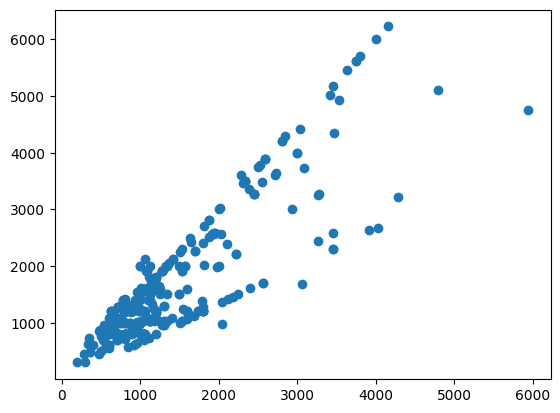

In [240]:
#Distribuição das Dimensões de Altura e Largura das Imagens

plt.scatter(df_teste['width'], df_teste['height'])

In [241]:
df_teste['image_format'].value_counts()

,count
image_format,
jpg,334
png,11
jpeg,8
JPG,6


<Axes: title={'center': 'Number of images per format'}, xlabel='image_format'>

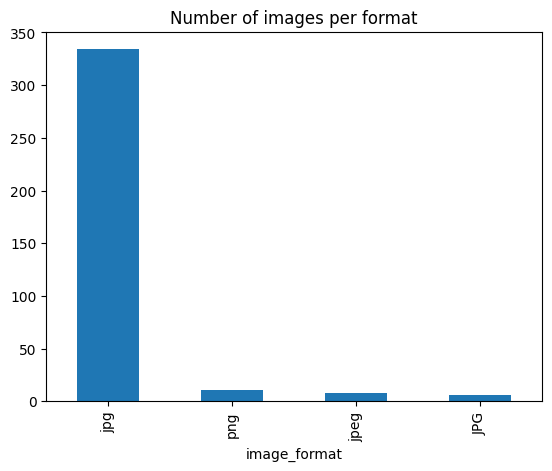

In [242]:
#Quantidade de Imagens por formato (JPG, PNG, etc.)

df_teste['image_format'].value_counts().plot(kind='bar', title='Number of images per format')

### 4 - Analisar a Qualidade das Imagens

In [243]:
#Total de imagens corrompidas

df_teste['corrupted'].sum()

0

In [244]:
#Quantidade de imagens corrompidas e não corrompidas

df_teste['corrupted'].value_counts()

,count
corrupted,
False,359


### 5 - Verificar a Distribuição das Classes

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]),
 [Text(0, 0, 'jalepeno'),
  Text(1, 0, 'paprika'),
  Text(2, 0, 'turnip'),
  Text(3, 0, 'orange'),
  Text(4, 0, 'pomegranate'),
  Text(5, 0, 'sweetpotato'),
  Text(6, 0, 'ginger'),
  Text(7, 0, 'watermelon'),
  Text(8, 0, 'cauliflower'),
  Text(9, 0, 'spinach'),
  Text(10, 0, 'cabbage'),
  Text(11, 0, 'mango'),
  Text(12, 0, 'onion'),
  Text(13, 0, 'pear'),
  Text(14, 0, 'eggplant'),
  Text(15, 0, 'cucumber'),
  Text(16, 0, 'chilli pepper'),
  Text(17, 0, 'raddish'),
  Text(18, 0, 'kiwi'),
  Text(19, 0, 'peas'),
  Text(20, 0, 'garlic'),
  Text(21, 0, 'corn'),
  Text(22, 0, 'lemon'),
  Text(23, 0, 'grapes'),
  Text(24, 0, 'carrot'),
  Text(25, 0, 'capsicum'),
  Text(26, 0, 'beetroot'),
  Text(27, 0, 'tomato'),
  Text(28, 0, 'potato'),
  Text(29, 0, 'apple'),
  Text(30, 0, 'sweetcorn'),
  Text(31, 0, 'lettuce'),
  Text(3

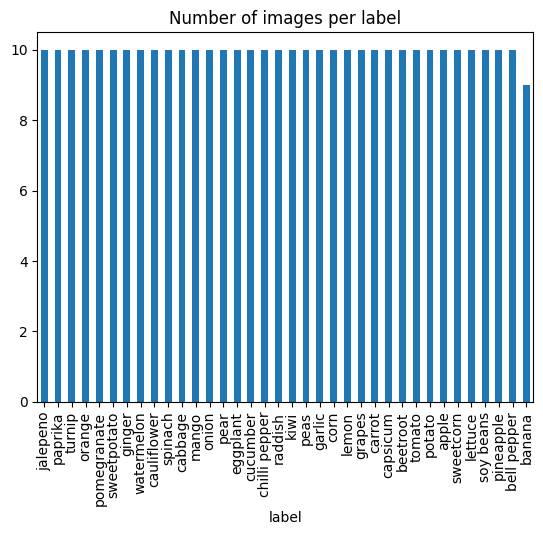

In [245]:
#Número de Imagens por Classe

df_teste['label'].value_counts().plot(kind='bar', title='Number of images per label')
plt.xticks(rotation=90)

### 6 - Verificar a Presença de Duplicatas

#### 6.1 N° total de imagens duplicadas

In [246]:
#Quantidade de imagens duplicatas

df_teste['image_hash'].duplicated().sum()

26

In [247]:
#dataframe com Imagens duplicatas
df_teste_duplicated = df_teste[df_teste['image_hash'].duplicated()]
df_teste_duplicated

,image_path,corrupted,image_hash,image_format,width,height,channels,label
69,./fruit-and-vegetable-image-recognition/test/c...,False,8143739c1f5a6537,jpg,720,1280,3,carrot
76,./fruit-and-vegetable-image-recognition/test/c...,False,e237d782a4f19915,jpg,785,1396,3,capsicum
97,./fruit-and-vegetable-image-recognition/test/t...,False,ffde88a165198744,jpg,1067,1600,3,tomato
116,./fruit-and-vegetable-image-recognition/test/a...,False,e1cf963493639c38,jpg,2216,2218,3,apple
122,./fruit-and-vegetable-image-recognition/test/s...,False,d1f1e3870c8f1ec8,jpg,2336,3504,3,sweetcorn
128,./fruit-and-vegetable-image-recognition/test/s...,False,87eda15658abc417,jpg,1333,2000,3,sweetcorn
187,./fruit-and-vegetable-image-recognition/test/r...,False,d1596baf8c183237,jpg,900,1200,3,raddish
195,./fruit-and-vegetable-image-recognition/test/c...,False,abb6d4edda1890c8,jpg,1536,1920,3,chilli pepper
206,./fruit-and-vegetable-image-recognition/test/b...,False,f89e8565c3781c3c,jpg,800,1200,3,banana
216,./fruit-and-vegetable-image-recognition/test/t...,False,db626c1ed6b18256,jpg,799,1200,3,turnip


#### 6.2 N° total de imagens presentes em 2 classes

In [248]:
df_teste_1=df_teste.copy()
df_teste_1['image_hash_str'] = df_teste_1['image_hash'].astype(str)

aa=df_teste_1.groupby('image_hash_str')['label'].nunique().reset_index(name='num_classes')

multi_class_hashes = aa[aa['num_classes'] > 1]['image_hash_str']

df_teste_1['imagem em 2 classes'] = df_teste_1['image_hash_str'].apply(lambda x: 's' if x in multi_class_hashes.values else 'n')


df_teste_1.drop(columns='image_hash_str', inplace=True)

df_teste_1[df_teste_1['imagem em 2 classes'] == 's']

,image_path,corrupted,image_hash,image_format,width,height,channels,label,imagem em 2 classes
35,./fruit-and-vegetable-image-recognition/test/c...,False,d1f1e3870c8f1ec8,jpg,2336,3504,3,corn,s
37,./fruit-and-vegetable-image-recognition/test/c...,False,87eda15658abc417,jpg,1333,2000,3,corn,s
73,./fruit-and-vegetable-image-recognition/test/c...,False,c5a63ef44460f38e,jpg,1912,2560,3,capsicum,s
122,./fruit-and-vegetable-image-recognition/test/s...,False,d1f1e3870c8f1ec8,jpg,2336,3504,3,sweetcorn,s
128,./fruit-and-vegetable-image-recognition/test/s...,False,87eda15658abc417,jpg,1333,2000,3,sweetcorn,s
353,./fruit-and-vegetable-image-recognition/test/b...,False,c5a63ef44460f38e,jpg,1936,2592,3,bell pepper,s


In [249]:
num_duplicatas = df_teste_1[df_teste_1['imagem em 2 classes'] == 's'].groupby('label')['imagem em 2 classes'].count().reset_index(name='numero imagens duplicadas no dataset')
unique_counts = df_teste.groupby('label')['image_hash'].nunique().reset_index(name='numero imagens unicas na classe')
unique_counts.merge(num_duplicatas,
                    on='label', how='left').sort_values(by='numero imagens duplicadas no dataset',
                                                                        ascending=False)

,label,numero imagens unicas na classe,numero imagens duplicadas no dataset
9,corn,10,2.0
31,sweetcorn,10,2.0
3,bell pepper,8,1.0
5,capsicum,9,1.0
0,apple,9,NaN
1,banana,8,NaN
2,beetroot,10,NaN
4,cabbage,9,NaN
6,carrot,9,NaN
7,cauliflower,10,NaN


In [250]:
df_teste_1[df_teste_1['imagem em 2 classes'] == 's']['image_path']

,image_path
35,./fruit-and-vegetable-image-recognition/test/c...
37,./fruit-and-vegetable-image-recognition/test/c...
73,./fruit-and-vegetable-image-recognition/test/c...
122,./fruit-and-vegetable-image-recognition/test/s...
128,./fruit-and-vegetable-image-recognition/test/s...
353,./fruit-and-vegetable-image-recognition/test/b...


In [251]:
'''
O código percorre as imagens duplicadas, encontra todas as imagens
com o mesmo hash e as agrupa em um dicionário, facilitando a identificação
e o acesso a todas as cópias de uma imagem duplicada.
'''
duplicated_images_teste = {}
for i in range(df_teste_1[df_teste_1['imagem em 2 classes'] == 's'].shape[0]):
  hash_duplicated_teste = df_teste_1[df_teste_1['imagem em 2 classes'] == 's'].iloc[i]['image_hash']
  duplicated_teste = df_teste[df_teste['image_hash'] == hash_duplicated_teste]["image_path"].values
  duplicated_images_teste[str(hash_duplicated_teste)] = duplicated_teste.tolist()

In [252]:
#Imagens correspondentes a cada imagem duplicada
duplicated_images_teste

{'d1f1e3870c8f1ec8': ['./fruit-and-vegetable-image-recognition/test/corn/Image_3.jpg',
  './fruit-and-vegetable-image-recognition/test/sweetcorn/Image_5.jpg'],
 '87eda15658abc417': ['./fruit-and-vegetable-image-recognition/test/corn/Image_1.jpg',
  './fruit-and-vegetable-image-recognition/test/sweetcorn/Image_9.jpg'],
 'c5a63ef44460f38e': ['./fruit-and-vegetable-image-recognition/test/capsicum/Image_6.jpg',
  './fruit-and-vegetable-image-recognition/test/bell pepper/Image_7.jpg']}

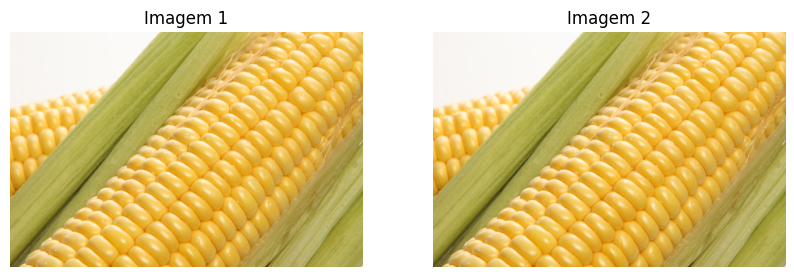

In [253]:
image1 = cv2.imread('./fruit-and-vegetable-image-recognition/test/corn/Image_3.jpg')
image2 = cv2.imread('./fruit-and-vegetable-image-recognition/test/sweetcorn/Image_5.jpg')

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Converter de BGR (formato OpenCV) para RGB (formato Matplotlib)
image1_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

# Mostrar a primeira imagem
axes[0].imshow(image1_rgb)
axes[0].axis('off')  # Remove os eixos
axes[0].set_title('Imagem 1')

# Mostrar a segunda imagem
axes[1].imshow(image2_rgb)
axes[1].axis('off')  # Remove os eixos
axes[1].set_title('Imagem 2')

# Exibir as imagens
plt.show()

## Imagens de treino

In [254]:
root_dir = './fruit-and-vegetable-image-recognition/train'

In [255]:
count_corrupted = 0
corrupted = list()

In [256]:
# Inicializa uma lista vazia para armazenar as informações processadas das imagens
dataframe_list = list()

# Percorre todos os diretórios na pasta raiz especificada
for folder in os.listdir(root_dir):
  # Cria o caminho completo para o diretório atual
  child_dir = os.path.join(root_dir, folder)

  # Itera sobre cada imagem no diretório atual
  for image in os.listdir(child_dir):
    # Cria o caminho completo para a imagem
    img_dir = os.path.join(child_dir, image)
    # Separa o nome da imagem de sua extensão
    _, image_format = image.split('.')
    # Carrega a imagem usando OpenCV
    img = cv2.imread(img_dir)


    # Verifica se a imagem foi carregada corretamente
    if img is not None:
      # Converte a imagem de BGR (formato OpenCV) para RGB (formato mais comum)
      img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

      # Converte a imagem OpenCV (NumPy array) para uma imagem do Pillow
      img_pil = Image.fromarray(img_rgb)

      # Gera o hash perceptual da imagem usando a biblioteca imagehash
      img_hash = imagehash.phash(img_pil)
      # Extrai a largura, altura e número de canais da imagem
      width, height, channels = img.shape
      # Marca a imagem como não corrompida
      img_corrupted = False
    else:
      # Incrementa o contador de imagens corrompidas
      count_corrupted += 1
      # Adiciona o caminho da imagem corrompida à lista de corrompidas
      corrupted.append(img_dir)
      # Marca a imagem como corrompida e define os atributos da imagem como None
      img_corrupted = True
      img_hash, image_format, width, height, channels = None, None, None, None, None

    # Adiciona as informações da imagem (diretório, status de corrupção, hash, formato, dimensões e pasta) à lista
    dataframe_list.append([img_dir, img_corrupted, img_hash, image_format, width, height, channels, folder])

In [257]:
df = pd.DataFrame(columns=['image_path', 'corrupted', 'image_hash', 'image_format', 'width', 'height', 'channels', 'label'], data = dataframe_list)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3115 entries, 0 to 3114
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   image_path    3115 non-null   object 
 1   corrupted     3115 non-null   bool   
 2   image_hash    3114 non-null   object 
 3   image_format  3114 non-null   object 
 4   width         3114 non-null   float64
 5   height        3114 non-null   float64
 6   channels      3114 non-null   float64
 7   label         3115 non-null   object 
dtypes: bool(1), float64(3), object(4)
memory usage: 173.5+ KB


## Comparação de imagens de treino e teste.

### Numero de imagens de teste presentes no conjunto de treino

In [258]:
# Existem imagens no conjunto de teste que ja existem no conjunto de treino ?
imagens_comuns = pd.merge(df_teste, df, on='image_hash', suffixes=('_teste', '_treino'))
imagens_comuns

,image_path_teste,corrupted_teste,image_hash,image_format_teste,width_teste,height_teste,channels_teste,label_teste,image_path_treino,corrupted_treino,image_format_treino,width_treino,height_treino,channels_treino,label_treino
0,./fruit-and-vegetable-image-recognition/test/j...,False,fb4ce1b05339b8a1,jpg,1548,1240,3,jalepeno,./fruit-and-vegetable-image-recognition/train/...,False,jpg,1548.0,1240.0,3.0,jalepeno
1,./fruit-and-vegetable-image-recognition/test/j...,False,fb4ce1b05339b8a1,jpg,1548,1240,3,jalepeno,./fruit-and-vegetable-image-recognition/train/...,False,jpg,1548.0,1240.0,3.0,jalepeno
2,./fruit-and-vegetable-image-recognition/test/j...,False,eba4841b1ef223cd,jpg,1200,1200,3,jalepeno,./fruit-and-vegetable-image-recognition/train/...,False,jpg,1200.0,1200.0,3.0,jalepeno
3,./fruit-and-vegetable-image-recognition/test/j...,False,c40c5ce79ea0f671,jpg,800,1422,3,jalepeno,./fruit-and-vegetable-image-recognition/train/...,False,jpg,800.0,1422.0,3.0,jalepeno
4,./fruit-and-vegetable-image-recognition/test/j...,False,b4cbd3346ccb321c,jpg,720,1084,3,jalepeno,./fruit-and-vegetable-image-recognition/train/...,False,jpg,720.0,1084.0,3.0,jalepeno
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,./fruit-and-vegetable-image-recognition/test/b...,False,be8cc1721d835abc,jpg,3744,5616,3,bell pepper,./fruit-and-vegetable-image-recognition/train/...,False,jpg,3744.0,5616.0,3.0,bell pepper
567,./fruit-and-vegetable-image-recognition/test/b...,False,ee95904ac1793e69,jpg,3475,4344,3,bell pepper,./fruit-and-vegetable-image-recognition/train/...,False,jpg,3475.0,4344.0,3.0,bell pepper
568,./fruit-and-vegetable-image-recognition/test/b...,False,ee95904ac1793e69,jpg,3475,4344,3,bell pepper,./fruit-and-vegetable-image-recognition/train/...,False,jpg,3475.0,4344.0,3.0,bell pepper
569,./fruit-and-vegetable-image-recognition/test/b...,False,b8d8c427c3719b3c,jpeg,1347,2000,3,bell pepper,./fruit-and-vegetable-image-recognition/train/...,False,jpeg,1347.0,2000.0,3.0,bell pepper


In [259]:
len(imagens_comuns)

571

O numero é maior que o conjunto 359. Isto decorre do número de imagens duplicadas presentes no conjunto de treino.

Uma imagem do conjunto de teste pode ser apresentada N vezes no conjunto de treino se nã houver  o tratamento de dados duplicados.

### Exemplo de imagens duplicadas

In [260]:
duplicated_images = {}
for i in range(imagens_comuns.shape[0]):
    hash_duplicated = imagens_comuns.iloc[i]['image_hash']
    image_path_teste = imagens_comuns.iloc[i]['image_path_teste']
    image_path_treino = imagens_comuns.iloc[i]['image_path_treino']
    duplicated_images[str(hash_duplicated)] = [image_path_teste, image_path_treino]
duplicated_images

{'fb4ce1b05339b8a1': ['./fruit-and-vegetable-image-recognition/test/jalepeno/Image_2.jpg',
  './fruit-and-vegetable-image-recognition/train/jalepeno/Image_99.jpg'],
 'eba4841b1ef223cd': ['./fruit-and-vegetable-image-recognition/test/jalepeno/Image_10.jpg',
  './fruit-and-vegetable-image-recognition/train/jalepeno/Image_7.jpg'],
 'c40c5ce79ea0f671': ['./fruit-and-vegetable-image-recognition/test/jalepeno/Image_5.jpg',
  './fruit-and-vegetable-image-recognition/train/jalepeno/Image_5.jpg'],
 'b4cbd3346ccb321c': ['./fruit-and-vegetable-image-recognition/test/jalepeno/Image_6.jpg',
  './fruit-and-vegetable-image-recognition/train/jalepeno/Image_6.jpg'],
 '8b5c6c87138b7678': ['./fruit-and-vegetable-image-recognition/test/jalepeno/Image_7.jpg',
  './fruit-and-vegetable-image-recognition/train/jalepeno/Image_10.jpg'],
 'a40cf5c78fba294c': ['./fruit-and-vegetable-image-recognition/test/jalepeno/Image_3.jpg',
  './fruit-and-vegetable-image-recognition/train/jalepeno/Image_3.jpg'],
 'b2cccc9b8c3

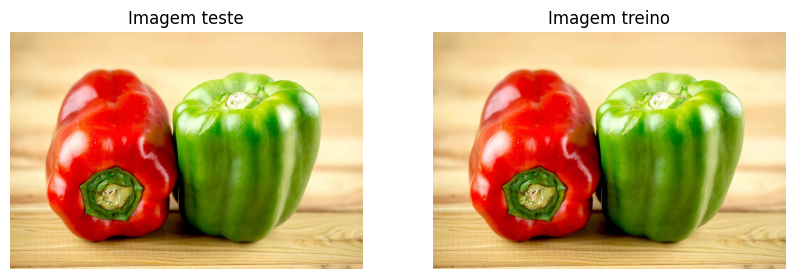

In [261]:
image1 = cv2.imread('./fruit-and-vegetable-image-recognition/test/bell pepper/Image_3.jpeg')
image2 = cv2.imread('./fruit-and-vegetable-image-recognition/train/bell pepper/Image_3.jpeg')

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Converter de BGR (formato OpenCV) para RGB (formato Matplotlib)
image1_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

# Mostrar a primeira imagem
axes[0].imshow(image1_rgb)
axes[0].axis('off')  # Remove os eixos
axes[0].set_title('Imagem teste')

# Mostrar a segunda imagem
axes[1].imshow(image2_rgb)
axes[1].axis('off')  # Remove os eixos
axes[1].set_title('Imagem treino')

# Exibir as imagens
plt.show()

In [262]:
df_verificacao=imagens_comuns.copy()
df_verificacao['image_hash_str'] = df_verificacao['image_hash'].astype(str)
df_verificacao=df_verificacao.groupby(['image_hash_str', 'label_teste']).size().reset_index(name='counts')
df_verificacao.sort_values(by='counts', ascending=False)

,image_hash_str,label_teste,counts
324,ffde88a165198744,tomato,4
304,f89e8565c3781c3c,banana,4
176,c3987cc7852a7535,cabbage,4
223,e0b8c7f8e3ca208f,sweetpotato,4
89,abb6d4edda1890c8,chilli pepper,4
...,...,...,...
79,a8d1d52ebe35c264,soy beans,1
212,d4d54a04ba552bd7,soy beans,1
78,a75374399c2cd30e,peas,1
77,a6da5b1eed320643,pomegranate,1


In [263]:
imagens_comuns[imagens_comuns['image_hash'].astype(str) == 'd1f1e3870c8f1ec8']

,image_path_teste,corrupted_teste,image_hash,image_format_teste,width_teste,height_teste,channels_teste,label_teste,image_path_treino,corrupted_treino,image_format_treino,width_treino,height_treino,channels_treino,label_treino
54,./fruit-and-vegetable-image-recognition/test/c...,False,d1f1e3870c8f1ec8,jpg,2336,3504,3,corn,./fruit-and-vegetable-image-recognition/train/...,False,jpg,2336.0,3504.0,3.0,corn
55,./fruit-and-vegetable-image-recognition/test/c...,False,d1f1e3870c8f1ec8,jpg,2336,3504,3,corn,./fruit-and-vegetable-image-recognition/train/...,False,jpg,2336.0,3504.0,3.0,corn
56,./fruit-and-vegetable-image-recognition/test/c...,False,d1f1e3870c8f1ec8,jpg,2336,3504,3,corn,./fruit-and-vegetable-image-recognition/train/...,False,jpg,2336.0,3504.0,3.0,sweetcorn
57,./fruit-and-vegetable-image-recognition/test/c...,False,d1f1e3870c8f1ec8,jpg,2336,3504,3,corn,./fruit-and-vegetable-image-recognition/train/...,False,jpg,2336.0,3504.0,3.0,sweetcorn
184,./fruit-and-vegetable-image-recognition/test/s...,False,d1f1e3870c8f1ec8,jpg,2336,3504,3,sweetcorn,./fruit-and-vegetable-image-recognition/train/...,False,jpg,2336.0,3504.0,3.0,corn
185,./fruit-and-vegetable-image-recognition/test/s...,False,d1f1e3870c8f1ec8,jpg,2336,3504,3,sweetcorn,./fruit-and-vegetable-image-recognition/train/...,False,jpg,2336.0,3504.0,3.0,corn
186,./fruit-and-vegetable-image-recognition/test/s...,False,d1f1e3870c8f1ec8,jpg,2336,3504,3,sweetcorn,./fruit-and-vegetable-image-recognition/train/...,False,jpg,2336.0,3504.0,3.0,sweetcorn
187,./fruit-and-vegetable-image-recognition/test/s...,False,d1f1e3870c8f1ec8,jpg,2336,3504,3,sweetcorn,./fruit-and-vegetable-image-recognition/train/...,False,jpg,2336.0,3504.0,3.0,sweetcorn


In [264]:
df_verificacao_2=imagens_comuns.copy()
df_verificacao_2['image_hash_str'] = df_verificacao_2['image_hash'].astype(str)
df_verificacao_2=df_verificacao_2.groupby(['image_hash_str', 'image_path_teste']).size().reset_index(name='counts')

contagem_por_hash = df_verificacao_2['image_hash_str'].value_counts()
contagem_por_hash

,count
image_hash_str,
ffde88a165198744,2
87eda15658abc417,2
bd076a1be9499326,2
f89e8565c3781c3c,2
c5a63ef44460f38e,2
...,...
aff09ac738376190,1
afe4d41a923c91d9,1
afe4d11bd03c64f0,1


In [265]:
contagem_por_hash.sum()

348

## Principais Resultados
<div align="center">

  <table>
    <thead>
      <tr>
        <th>Verificação</th>
        <th>Resultado</th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <td>Número de Dados Ausentes</td>
        <td>1</td>
      </tr>
      <tr>
        <td>Número de Imagens Corrompidos</td>
        <td>0</td>
      </tr>
      <tr>
        <td>Número de Imagens Duplicadas</td>
        <td>26</td>
      </tr>
      <tr>
        <td>Número de Imagens Multiclasses</td>
        <td>3</td>
      </tr>
      <tr>
        <td>Número de Imagens de Teste <br> Presentes no Conjunto de Treino</td>
        <td>348</td>
      </tr>
    </tbody>
  </table>
</p>
</div>


## Conclusões

- Segundo o autor do Dataset há 360 dados de teste, sendo 10 amostras de cada uma das 36 classes. Verificamos que na realidade existem 359 registros de daods de teste, sendo igualmente distribuídos, com exceção da classe 'banana' que contém 9 registros.
- Não há imagens corrompidas.
- Existem imgens duplicadas dentro de uma mesma classe e em classes diferentes.
  - Dados duplicados entre classes pode aumentar a taxa de erros na classificação de detemrinada classe, podendo confundir a interpretação do resultado.
  - Dados duplicados dentro de uma mesma classe também pode confundir a interpretação dos reusltados, uma vez que avaliando uma mesma imagem de teste N vezes a taxa de acerto do modelo treinado pode se aumentar, entretanto este aumento mostra que o modelo generaliza bem, pois ele pode estar bem ajustado especificamente para a imagem que está repetido no teste, inflando os resultados corretos.
- Existem dados duplicados entre o conjunto de Teste e Treino, sendo que para que o modelo generalize bem os dados de teste não devem existir nos dados de treino, isto pode sobreajustar o modelo.
- Nos trabalhos seguintes abordaremos rotinas para o tratamento das inconsistências presentes neste dataset.